In [1]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt 
from matplotlib import pyplot
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.simplefilter(action='ignore')

In [3]:
df=pd.read_csv("HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


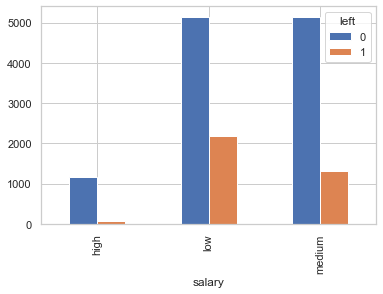

In [12]:
# TASK 1
pd.crosstab(df.salary,df.left).plot(kind='bar')
plt.show()

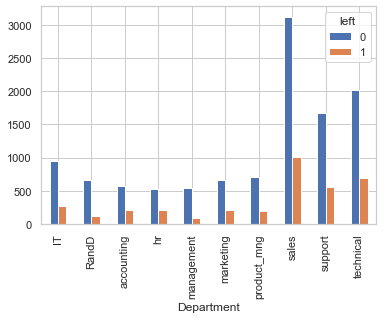

In [13]:
pd.crosstab(df.Department,df.left).plot(kind='bar')
plt.show()

In [9]:
# TASK 2a
df[df.isnull().any(axis=1)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary


There is no missing value in the dataframe.

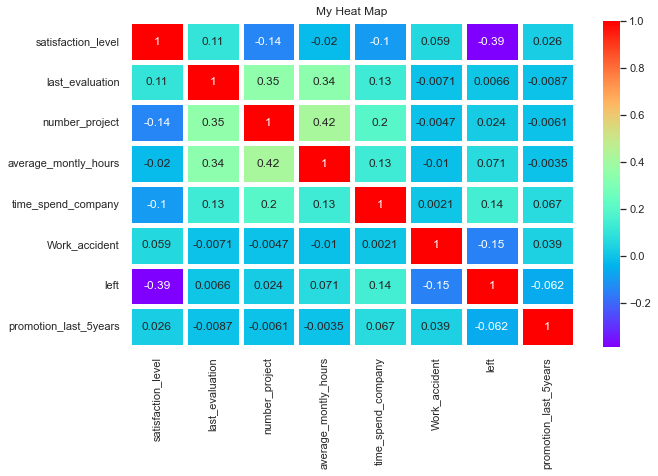

In [10]:
# TASK 2b
fig, ax=plt.subplots(figsize= (10,6))
sns.heatmap(df.corr(), cmap='rainbow', annot=True, linewidth=5).set_title('My Heat Map')
plt.show()

In [16]:
# TASK 2c
encoder = preprocessing.LabelEncoder()

encoder.fit(df.salary)
print(encoder.classes_)
df.salary = encoder.transform(df.salary)

['high' 'low' 'medium']


In [17]:
encoder1 = preprocessing.LabelEncoder()

encoder1.fit(df.Department)
print(encoder1.classes_)
df.Department = encoder1.transform(df.Department)

['IT' 'RandD' 'accounting' 'hr' 'management' 'marketing' 'product_mng'
 'sales' 'support' 'technical']


The 'left' column is having maximum correlation with satisfaction level but we cannot exclude it from our analysis as the correlation in not that high.

In [18]:
# TASK 3a
HR_train, HR_test = train_test_split(df,train_size = 0.75)

print('Size of training dataset: ', HR_train.shape)
print('Size of test dataset: ', HR_test.shape)

Size of training dataset:  (11249, 10)
Size of test dataset:  (3750, 10)


In [19]:
X_train = HR_train.drop(columns='left', axis =1)
Y_train = HR_train['left']
X_test = HR_test.drop(columns='left', axis =1)
Y_test = HR_test['left']
X_train.shape, Y_train.shape, X_test.shape

((11249, 9), (11249,), (3750, 9))

In [20]:
# TASK 3b
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)
Y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [27]:
acc_train = round(logreg.score(X_train, Y_train) * 100, 2)
acc_train

76.5

In [26]:
acc_test = round(logreg.score(X_test, Y_test) * 100, 2)
acc_test

76.56

Satisfaction level

In [22]:
# TASK 4a
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[2634,  238],
       [ 641,  237]], dtype=int64)

In [28]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('accuracy:', accuracy_score(Y_test, Y_pred))
print('recall:', recall_score(Y_test, Y_pred, average='weighted'))
print('f1-score:', f1_score(Y_test, Y_pred, average='weighted'))
print('precision:', precision_score(Y_test, Y_pred))

accuracy: 0.7656
recall: 0.7656
f1-score: 0.7383748878276749
precision: 0.49894736842105264


In [29]:
# TASK 4b
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, Y_pred)
print('AUC: %.3f' % auc)

AUC: 0.594
